## Introduction

Data Description:

ID (UID): Unique identifier for each candidate.

Salary: Continuous variable representing the annual CTC offered to the candidate (in INR).

DOJ (Date of Joining): Date variable indicating the date of joining the company.

DOL (Date of Leaving): Date variable indicating the date of leaving the company.

Designation: Categorical variable representing the job title offered.

JobCity: Categorical variable representing the location of the job (city).

Gender: Categorical variable representing the candidate's gender.

DOB (Date of Birth): Date variable indicating the date of birth of the candidate.

10percentage: Continuous variable representing the overall marks obtained in grade 10 examinations.

10board: Categorical variable representing the school board whose curriculum the candidate followed in grade 10.

12graduation: Date variable indicating the year of graduation from senior year high school.

12percentage: Continuous variable representing the overall marks obtained in grade 12 examinations.

12board: Categorical variable representing the school board whose curriculum the candidate followed in grade 12.

CollegeID: Unique identifier identifying the college which the candidate attended.

CollegeTier: Categorical variable representing the tier of college.

Degree: Categorical variable representing the degree obtained/pursued by the candidate.

Specialization: Categorical variable representing the specialization pursued by the candidate.

CollegeGPA: Continuous variable representing the aggregate GPA at graduation.

CollegeCityID: Unique identifier identifying the city in which the college is located.

CollegeCityTier: Categorical variable representing the tier of the city in which the college is located.

CollegeState: Categorical variable representing the name of states.

GraduationYear: Date variable indicating the year of graduation (Bachelor’s degree).

English: Continuous variable representing scores in AMCAT English section.

Logical: Continuous variable representing scores in AMCAT Logical section.

Quant: Continuous variable representing scores in AMCAT Quantitative section.

Domain: Continuous/Standardized variable representing scores in AMCAT’s domain module.

ComputerProgramming: Continuous variable representing score in AMCAT’s Computer programming section.

ElectronicsAndSemicon: Continuous variable representing score in AMCAT’s Electronics & Semiconductor Engineering section.

ComputerScience: Continuous variable representing score in AMCAT’s Computer Science section.

MechanicalEngg: Continuous variable representing score in AMCAT’s Mechanical Engineering section.

ElectricalEngg: Continuous variable representing score in AMCAT’s Electrical Engineering section.

TelecomEngg: Continuous variable representing score in AMCAT’s Telecommunication Engineering section.

CivilEngg: Continuous variable representing score in AMCAT’s Civil Engineering section.

Conscientiousness: Continuous/Standardized variable representing scores in one of the sections of AMCAT’s personality test.

Agreeableness: Continuous/Standardized variable representing scores in one of the sections of AMCAT’s personality test.

Extraversion: Continuous/Standardized variable representing scores in one of the sections of AMCAT’s personality test.

Neuroticism: Continuous/Standardized variable representing scores in one of the sections of AMCAT’s personality test.

Openness_to_experience: Continuous/Standardized variable representing scores in one of the sections of AMCAT’s personality test.

Objective:

The objective is to predict the salary (Annual CTC offered) based on the given independent variables such as cognitive skills, technical skills, personality traits, demographic features, educational background, and job-related details. This is to be approached by Exploratory Data Analysis (EDA) on understanding the characteristics of the dataset and identifying potential relationships between the independent variables and the target variable (Salary).

In [2]:
# import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load dataset
df = pd.read_csv(r'G:\python applications\Intern_tasks\eda-project\data.csv')

In [4]:
# head of data
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [5]:
# shape of data
df.shape

(3998, 39)

In [6]:
# information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

## Data Cleaning

In [7]:
# drop the column Unnamed: 0
df = df.drop('Unnamed: 0',axis = 1)

In [8]:
# Convert date-related columns to datetime type
date_columns = ['DOJ','DOB', '12graduation', 'GraduationYear']
df[date_columns] = df[date_columns].apply(pd.to_datetime)

## Data Analysis

### Univariate Analysis - Statistical Non Visual Analysis

In [9]:
discrete_df = df.select_dtypes(include=['object'])

numerical_df = df.select_dtypes(include=['int64', 'float64'])

In [10]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()

In [11]:
discrete_univariate_analysis(discrete_df)

********** DOL **********
count                                                   3998
nunique                                                   67
unique     [present, 3/1/15 0:00, 5/1/15 0:00, 7/1/15 0:0...
Name: DOL, dtype: object
Value Counts: 
 present         1875
4/1/15 0:00      573
3/1/15 0:00      124
5/1/15 0:00      112
1/1/15 0:00       99
                ... 
3/1/05 0:00        1
10/1/15 0:00       1
2/1/10 0:00        1
2/1/11 0:00        1
10/1/10 0:00       1
Name: DOL, Length: 67, dtype: int64

********** Designation **********
count                                                   3998
nunique                                                  419
unique     [senior quality engineer, assistant manager, s...
Name: Designation, dtype: object
Value Counts: 
 software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
           

In [12]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std']))
        print()

In [13]:
numerical_univariate_analysis(numerical_df)

********** ID **********
min       1.124400e+04
max       1.298275e+06
mean      6.637945e+05
median    6.396000e+05
std       3.632182e+05
Name: ID, dtype: float64

********** Salary **********
min       3.500000e+04
max       4.000000e+06
mean      3.076998e+05
median    3.000000e+05
std       2.127375e+05
Name: Salary, dtype: float64

********** 10percentage **********
min       43.000000
max       97.760000
mean      77.925443
median    79.150000
std        9.850162
Name: 10percentage, dtype: float64

********** 12percentage **********
min       40.000000
max       98.700000
mean      74.466366
median    74.400000
std       10.999933
Name: 12percentage, dtype: float64

********** CollegeID **********
min           2.000000
max       18409.000000
mean       5156.851426
median     3879.000000
std        4802.261482
Name: CollegeID, dtype: float64

********** CollegeTier **********
min       1.000000
max       2.000000
mean      1.925713
median    2.000000
std       0.262270
Name: Col

### Univariate - Visual Analysis

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

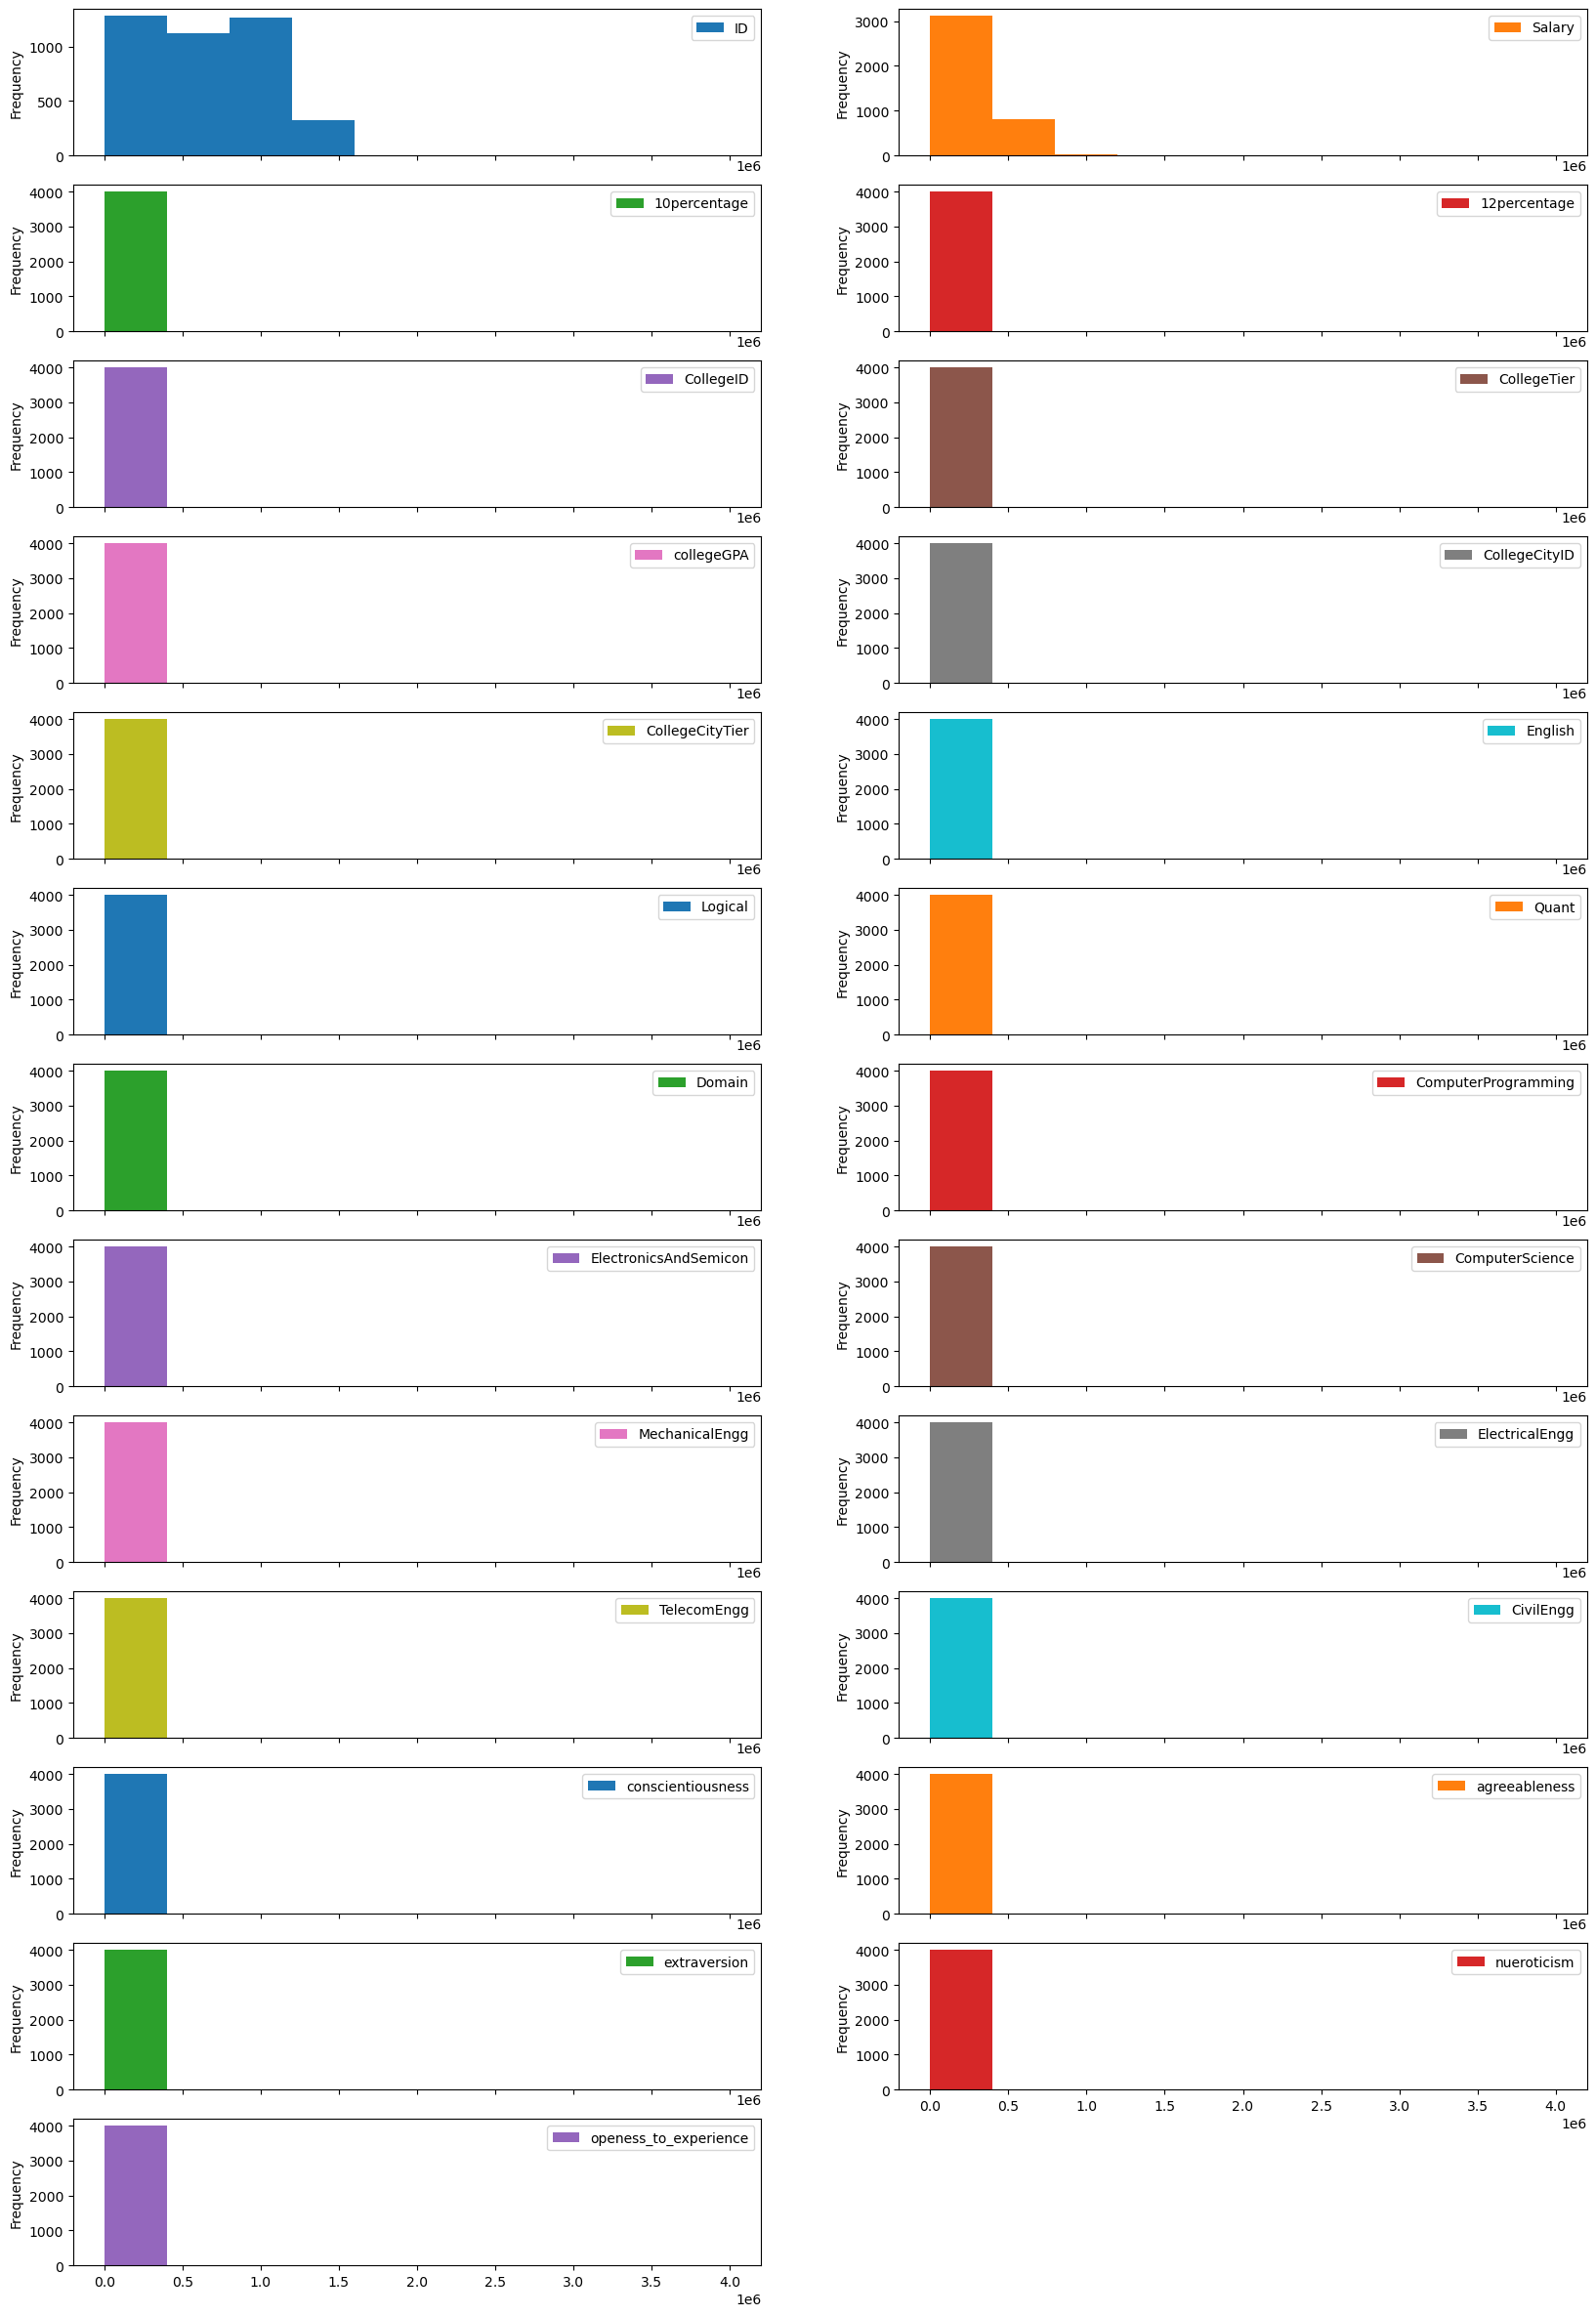

In [14]:
df.plot(kind='hist', subplots=True, layout=(13, 2), figsize=(20, 30))

ID                          Axes(0.125,0.83;0.352273x0.05)
Salary                   Axes(0.547727,0.83;0.352273x0.05)
10percentage                Axes(0.125,0.77;0.352273x0.05)
12percentage             Axes(0.547727,0.77;0.352273x0.05)
CollegeID                   Axes(0.125,0.71;0.352273x0.05)
CollegeTier              Axes(0.547727,0.71;0.352273x0.05)
collegeGPA                  Axes(0.125,0.65;0.352273x0.05)
CollegeCityID            Axes(0.547727,0.65;0.352273x0.05)
CollegeCityTier             Axes(0.125,0.59;0.352273x0.05)
English                  Axes(0.547727,0.59;0.352273x0.05)
Logical                     Axes(0.125,0.53;0.352273x0.05)
Quant                    Axes(0.547727,0.53;0.352273x0.05)
Domain                      Axes(0.125,0.47;0.352273x0.05)
ComputerProgramming      Axes(0.547727,0.47;0.352273x0.05)
ElectronicsAndSemicon       Axes(0.125,0.41;0.352273x0.05)
ComputerScience          Axes(0.547727,0.41;0.352273x0.05)
MechanicalEngg              Axes(0.125,0.35;0.352273x0.0

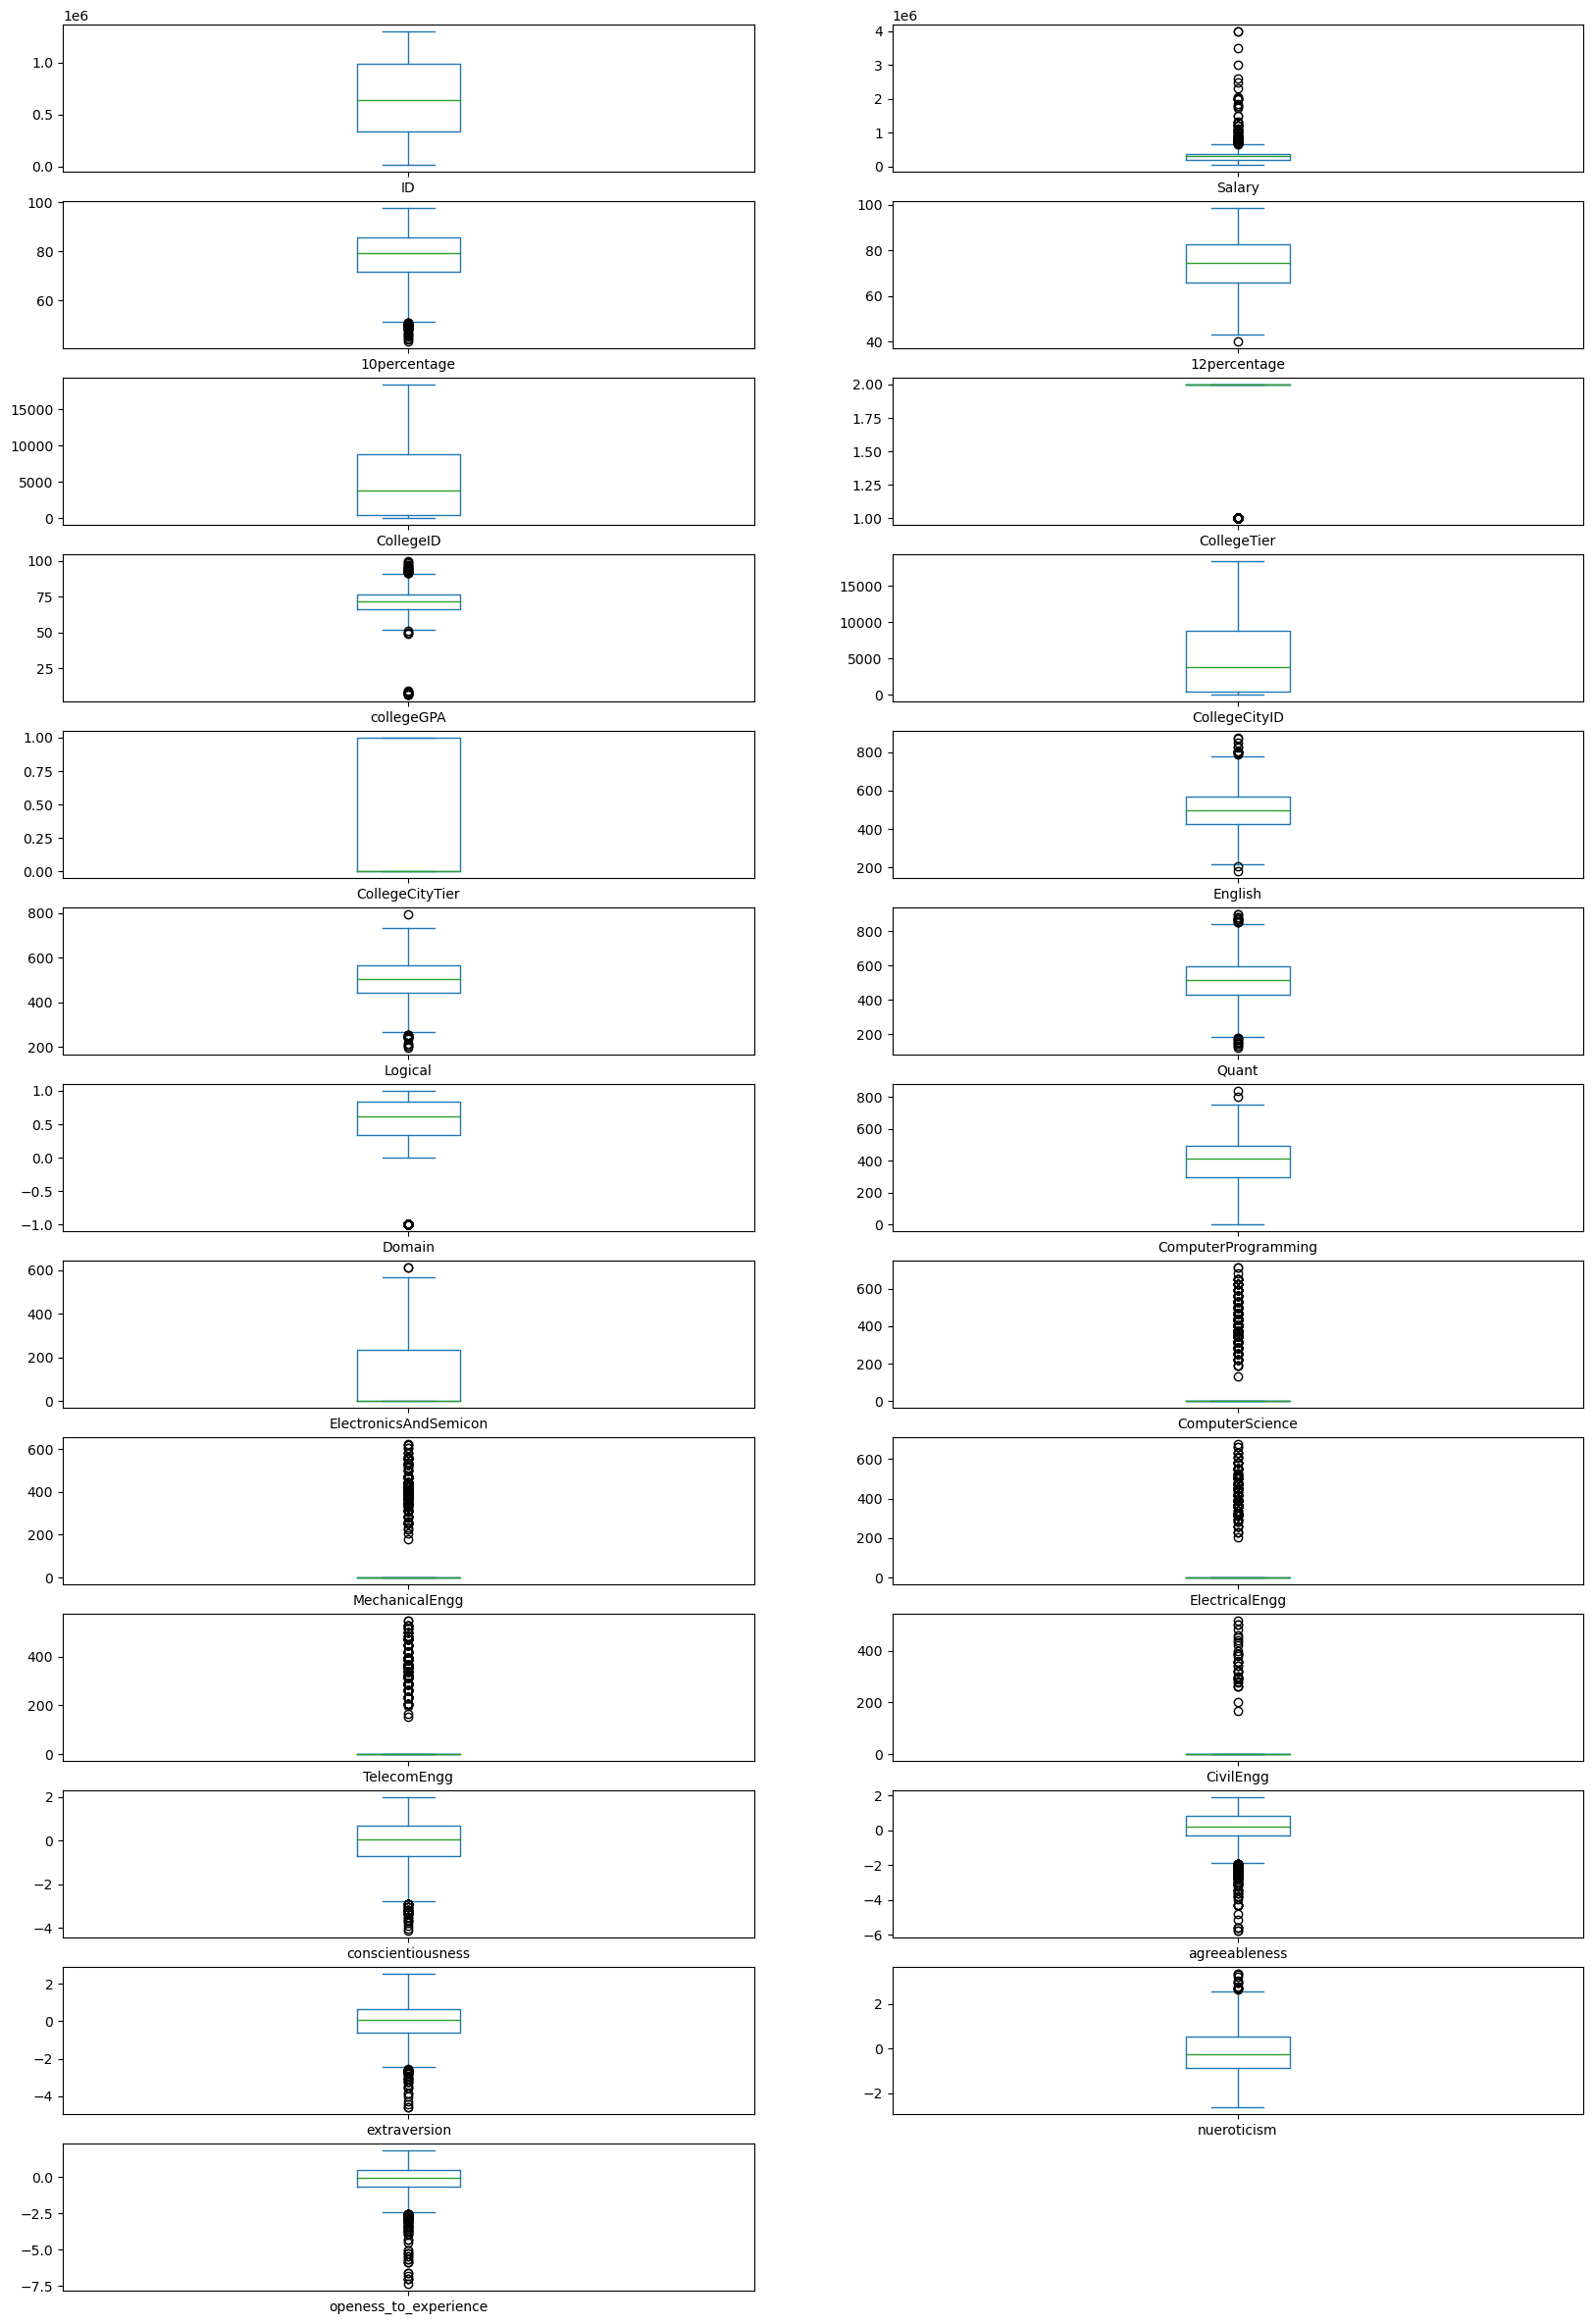

In [15]:
df.plot(kind='box', subplots=True, layout=(13, 2), figsize=(20, 30))

## Observations:

### Salary Distribution:

* The salary ranges from 35,000 to 4,000,000 with a mean of approximately 307,700.
* The median salary is 300,000, indicating that half of the individuals earn below this amount and half earn above it.
* The standard deviation is about 212,700, suggesting a relatively wide dispersion of salaries around the mean.
* There are many outliers in the Salary as we can see from the box plot indicating major variation in salaries of the people.

### Educational Performance:

* The 10th and 12th percentages have means around 77.9 and 74.5 respectively, with standard deviations of approximately 9.9 and 11.0.
* The mean college GPA is 71.5 with a standard deviation of around 8.2.
* In the 10th percentage, there are outliers where the percentage is less than 60% indicating that some individuals had the percentage below 60%.
* In the 12th percentage there is a single outlier where the percentage of the individual is less than 40%.
* These statistics indicate a moderate level of variability in educational performance among the individuals in the dataset.

### Personality Traits:

* Personality traits such as conscientiousness, agreeableness, extraversion, neuroticism, and openness to experience are measured on scales with different ranges.
* For example, conscientiousness ranges from approximately -4.13 to 1.99, with a mean close to 0 and a standard deviation of about 1.03.
* These traits show varying levels of dispersion around their means, with agreeableness having a relatively high standard deviation compared to others.

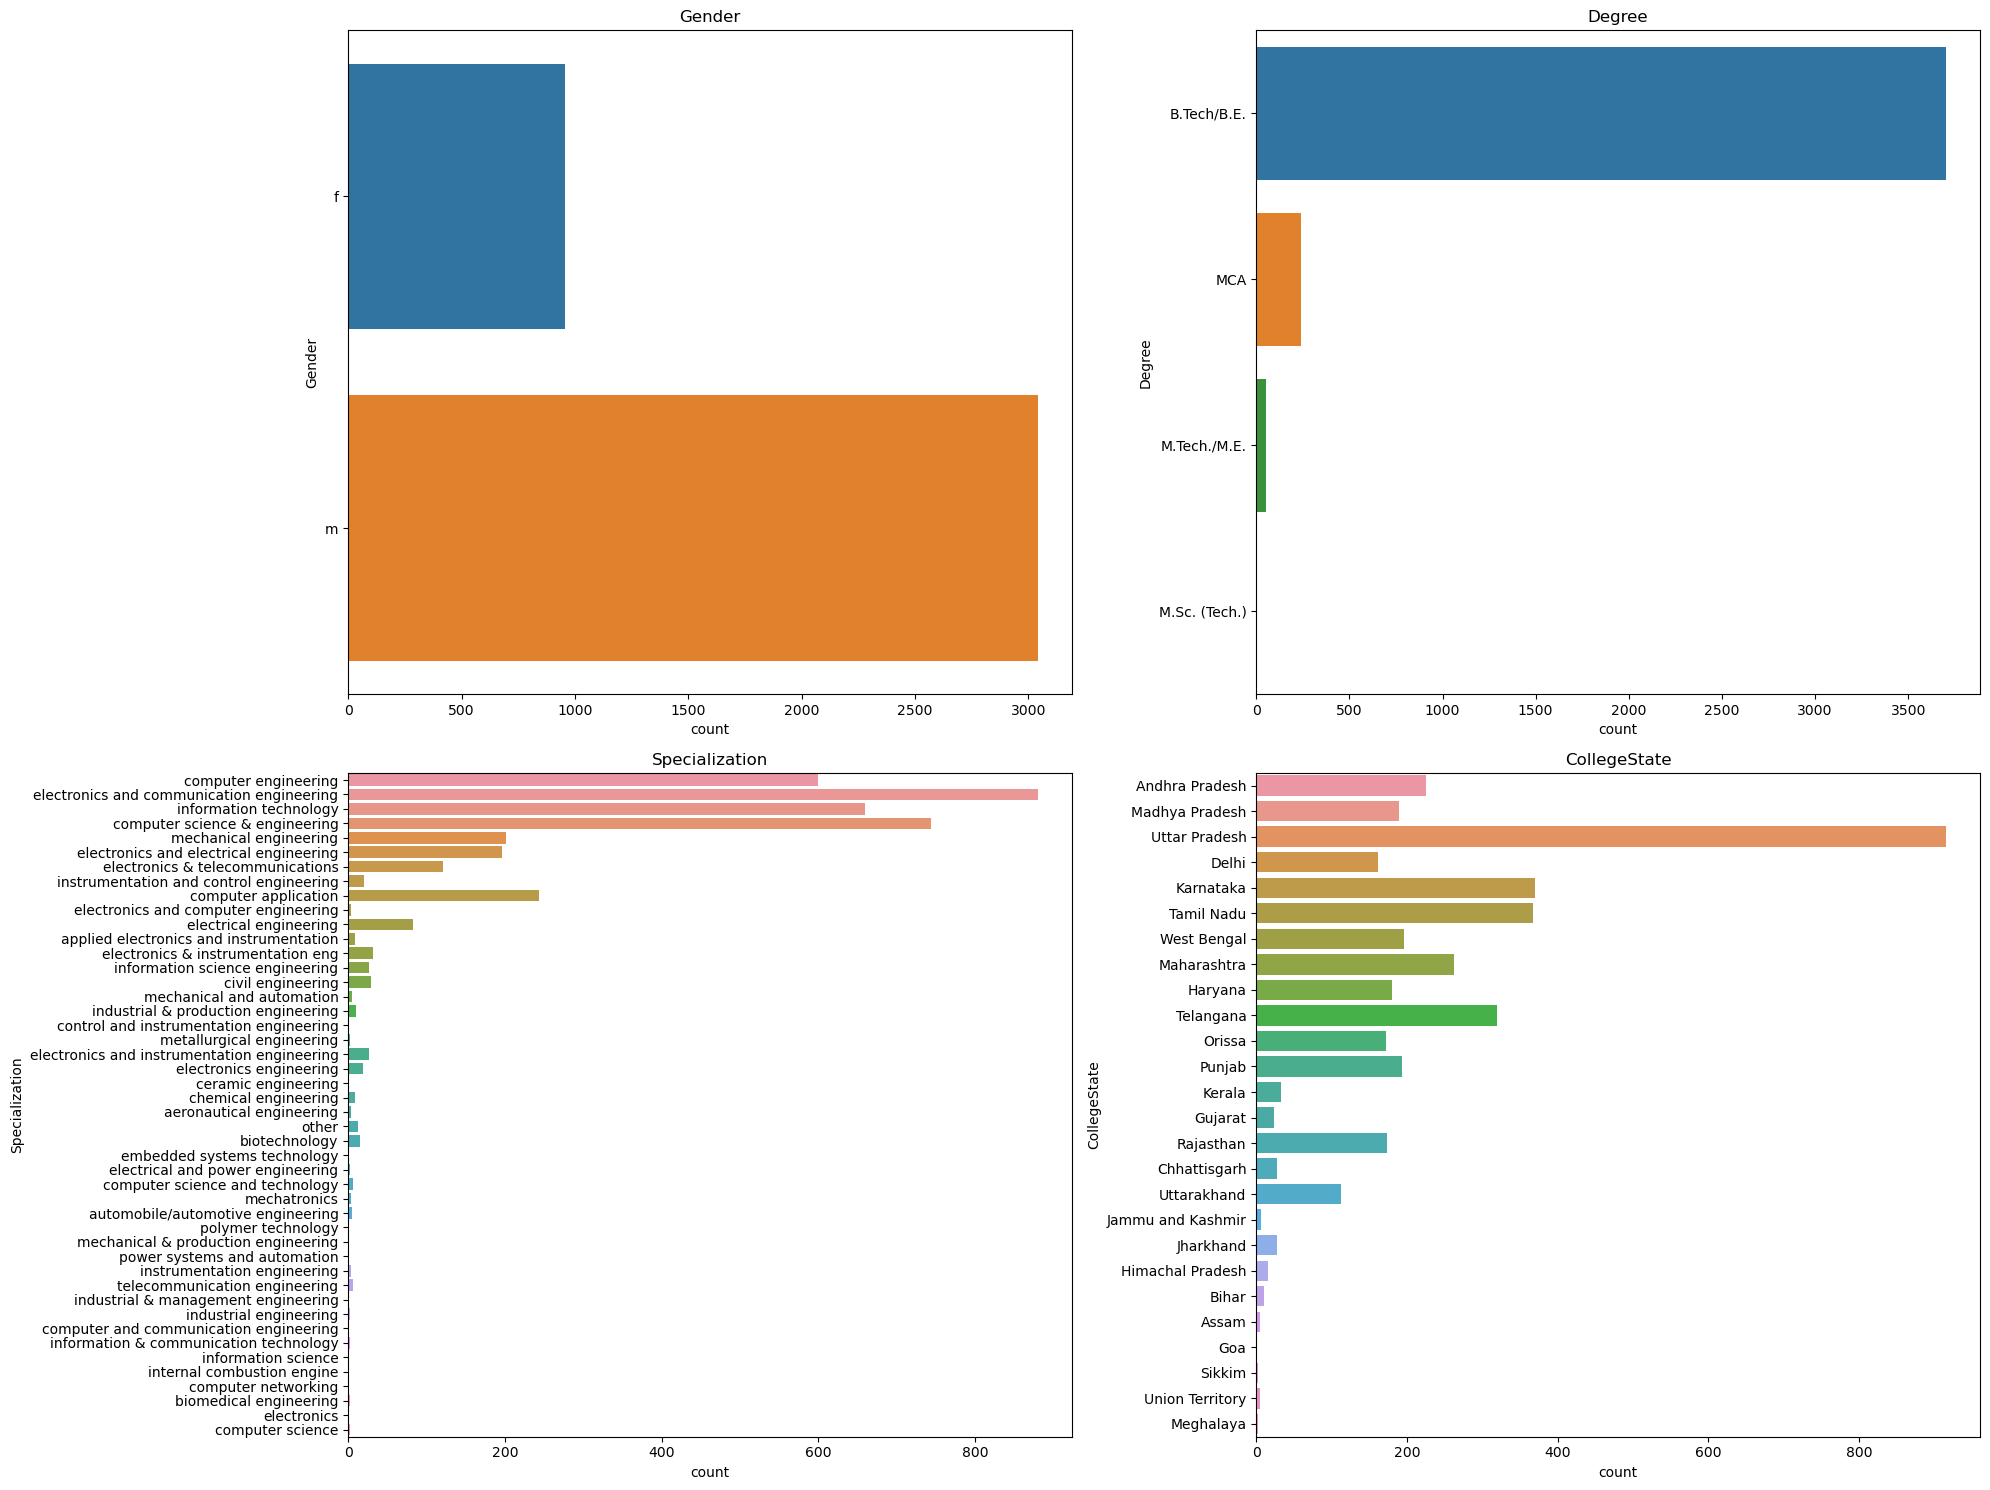

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only the specified columns
selected_cols = ['Gender', 'Degree', 'Specialization', 'CollegeState']
selected_df = discrete_df[selected_cols]

# Determine layout
num_rows = 2
num_cols = 2

# Create subplot layout
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 15))

# Plot count plots for selected categorical columns
for i, column in enumerate(selected_cols):
    row = i // num_cols
    col = i % num_cols
    sns.countplot(y=column, data=selected_df, ax=axes[row, col])  
    axes[row, col].set_title(column)
    axes[row, col].tick_params(axis='y', rotation=0)  

plt.tight_layout()
plt.show()



## Observations:

### Gender Distribution:

* There are two unique genders: 'm' and 'f'.
* The majority of individuals (about 76.1%) are male ('m'), while approximately 23.9% are female ('f').

### Degree Distribution:

* There are four unique degrees: 'B.Tech/B.E.', 'MCA', 'M.Tech./M.E.', and 'M.Sc. (Tech.)'.
* 'B.Tech/B.E.' is the most common degree, constituting about 92.5% of the dataset.
* 'MCA' (Master of Computer Applications) is the next most common degree, making up around 6.1% of the dataset.
* 'M.Tech./M.E.' (Master of Technology/Master of Engineering) and 'M.Sc. (Tech.)' (Master of Science in Technology) are less common, together comprising only about 1.4% of the dataset.

### Specialization Distribution:

* There are 46 unique specializations.
* The most common specializations include 'electronics and communication engineering', 'computer science & engineering', 'information technology', and 'computer engineering'.
* 'electronics and communication engineering' is the most prevalent specialization, followed by 'computer science & engineering' and 'information technology'.

### College State Distribution:

* There are 26 unique states where colleges are located.
* The top states represented in the dataset are Uttar Pradesh, Karnataka, Tamil Nadu, Telangana, and Maharashtra.
* Uttar Pradesh has the highest representation, followed by Karnataka and Tamil Nadu.

## Bivariate Analysis

### Continuous vs Continuous Numerical Data

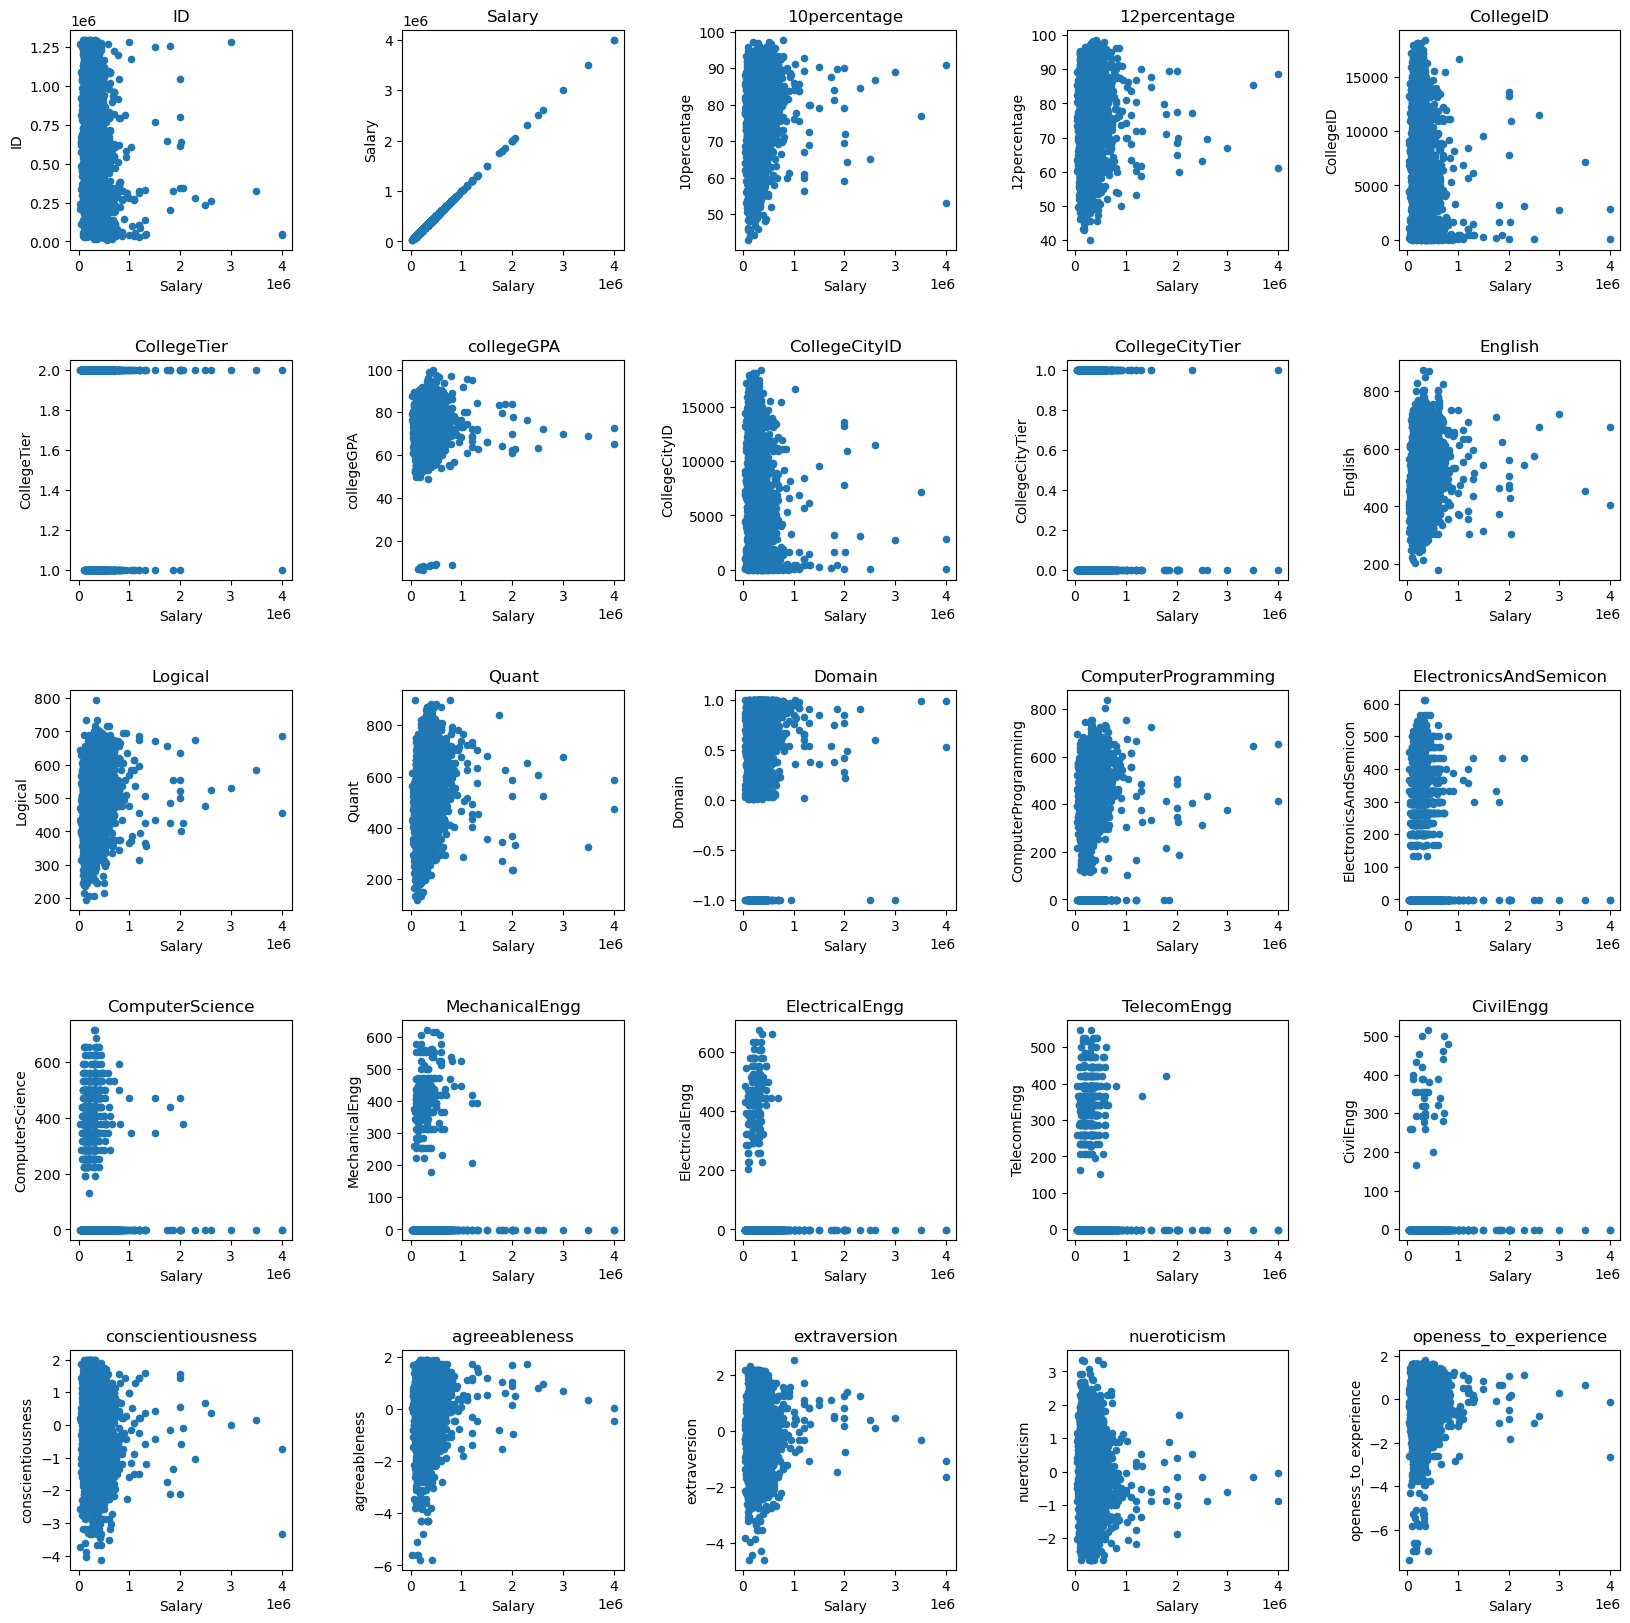

In [17]:
# Calculate the number of rows and columns needed for subplots
num_rows = (len(numerical_df.columns) + 4) // 5
num_cols = min(len(numerical_df.columns), 5)

# Create a figure and axis object
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 4*num_rows))
plt.subplots_adjust(wspace=0.5, hspace=0.5)  

# Iterate through each numerical column
for i, col in enumerate(numerical_df.columns):
    row_index = i // num_cols  
    col_index = i % num_cols   
    
    # Plot the scatter plot on the appropriate axis
    numerical_df.plot(kind='scatter', x='Salary', y=col, ax=axes[row_index, col_index], title=col)

plt.show()

## Observations:
* The scatter plots show the relationship between various academic and professional factors and an individual's salary. Some of the factors include college tier, college GPA, city tier, English score, domain of study, conscientiousness, and agreeableness.
* There appears to be a positive correlation between college tier and salary. This means that people who went to colleges in higher tiers tend to earn more money than people who went to colleges in lower tiers.
* There also appears to be a positive correlation between college GPA and salary. This means that people with higher GPAs tend to earn more money than people with lower GPAs.
* The relationship between city tier and salary is less clear. There seems to be a positive correlation for some data points, but there are also many outliers.
* There is no clear correlation between English score and salary. The data points are scattered evenly across the plot.
* There appears to be a positive correlation between domain of study and salary. People who studied computer programming and electronics seem to earn more money than people who studied other domains.
* There is no clear correlation between conscientiousness and salary or agreeableness and salary. The data points are scattered evenly across the plots.

### Continuous Numerical vs Discrete data

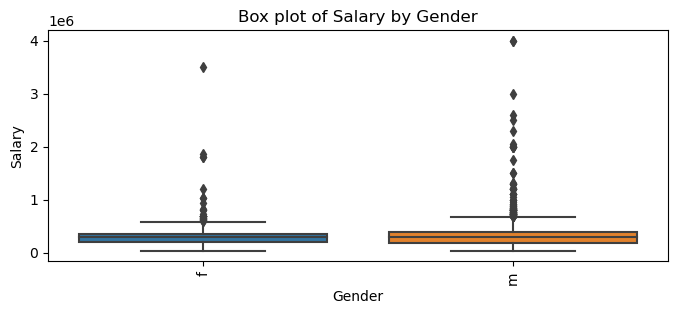

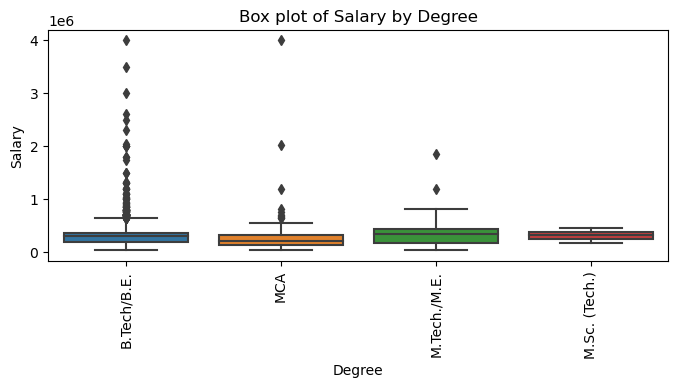

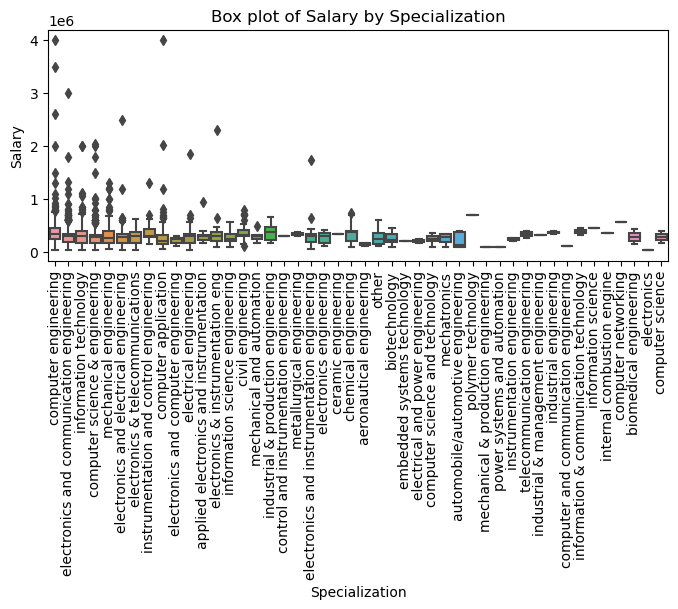

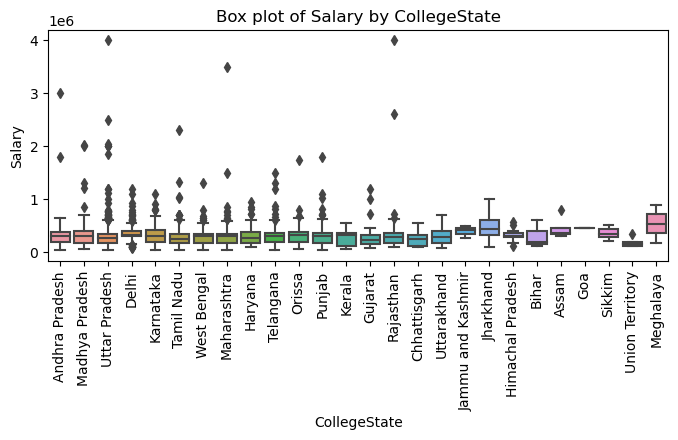

In [18]:
selected_cols = ['Gender', 'Degree', 'Specialization', 'CollegeState']
for col in selected_cols:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=col, y='Salary', data=df)
    plt.title(f'Box plot of Salary by {col}')
    plt.xticks(rotation=90)
    plt.show()

## Observations:
* From the above graphs, we can observe the relationship between salary and gender, degree, specialization, and college state of the individual.
* Most of the individuals identified as 'Male' have the highest salary of 4000000, compared to females who have the highest salary range between 3000000 and 4000000.
* There are many outliers indicating extreme salaries for certain male and female individuals.
* Individuals with a B.Tech/B.E. degree have the highest salaries, followed by MCA and M.Tech./M.E. graduates. M.Sc. graduates * tend to have the lowest salaries.
* Within the engineering field, individuals with a B.Tech/BE in computer engineering, followed by computer application graduates, have the highest salaries.
* Individuals who pursued their degrees in colleges in Uttar Pradesh have the highest salaries, followed by those in Rajasthan and Andhra Pradesh.

### Discrete vs Discrete data

In [19]:
discrete_df.columns

Index(['DOL', 'Designation', 'JobCity', 'Gender', '10board', '12board',
       'Degree', 'Specialization', 'CollegeState'],
      dtype='object')

In [23]:
for col in discrete_df.columns:
    print(pd.crosstab(df[col], df['Gender'],normalize = 'index'))

Gender              f         m
DOL                            
1/1/11 0:00  0.000000  1.000000
1/1/12 0:00  0.300000  0.700000
1/1/13 0:00  0.350000  0.650000
1/1/14 0:00  0.260870  0.739130
1/1/15 0:00  0.171717  0.828283
...               ...       ...
9/1/12 0:00  0.400000  0.600000
9/1/13 0:00  0.086957  0.913043
9/1/14 0:00  0.218750  0.781250
9/1/15 0:00  0.142857  0.857143
present      0.238933  0.761067

[67 rows x 2 columns]
Gender                                f         m
Designation                                      
.net developer                 0.235294  0.764706
.net web developer             0.250000  0.750000
account executive              0.500000  0.500000
account manager                0.000000  1.000000
admin assistant                0.000000  1.000000
...                                 ...       ...
web designer and seo           1.000000  0.000000
web developer                  0.314815  0.685185
web intern                     1.000000  0.000000
website dev

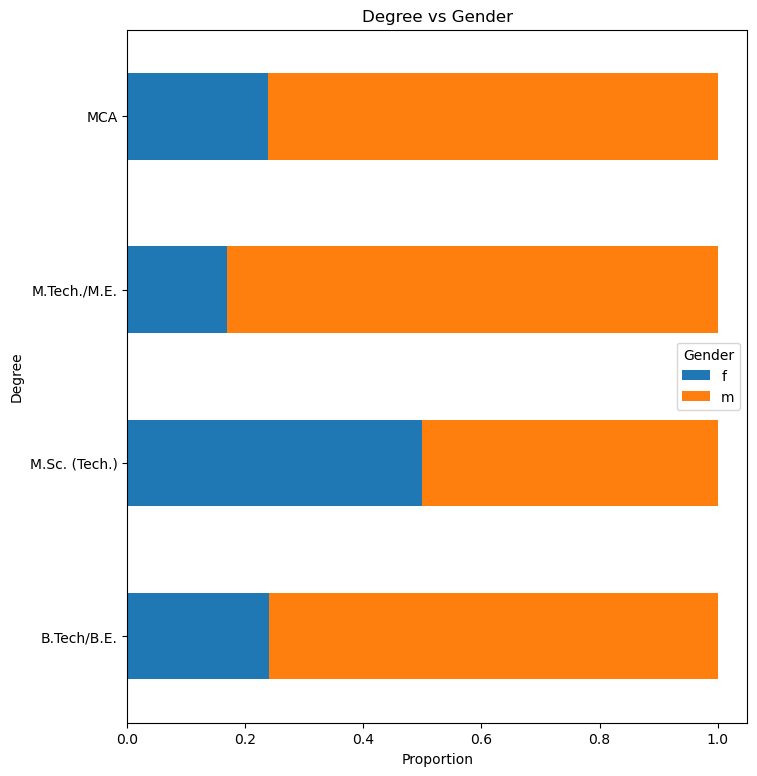

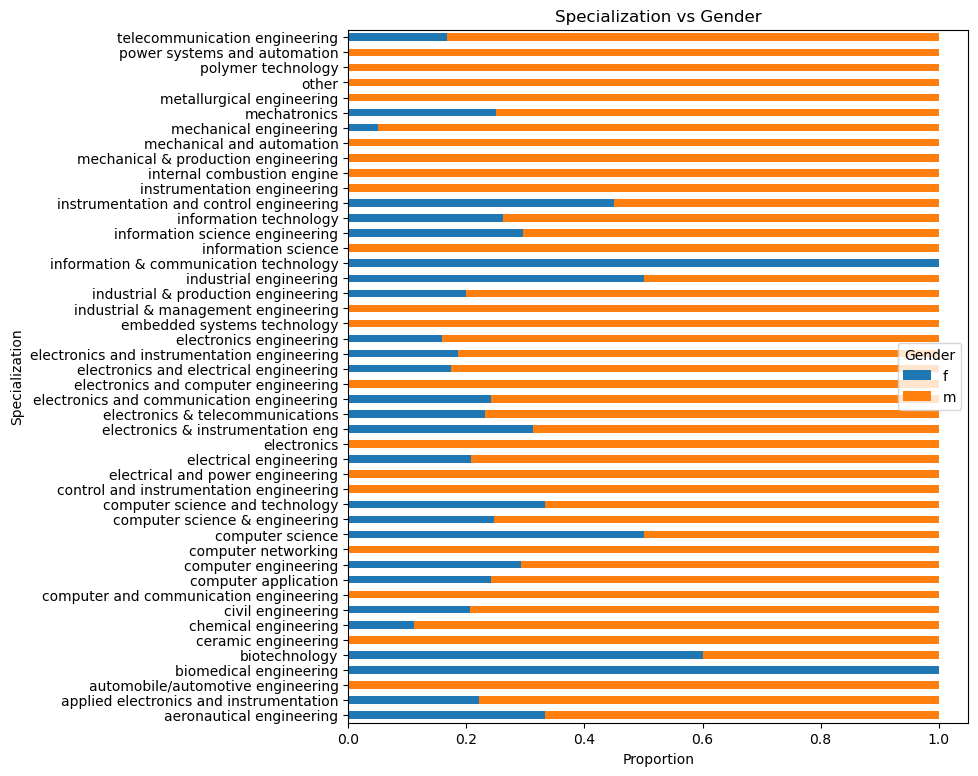

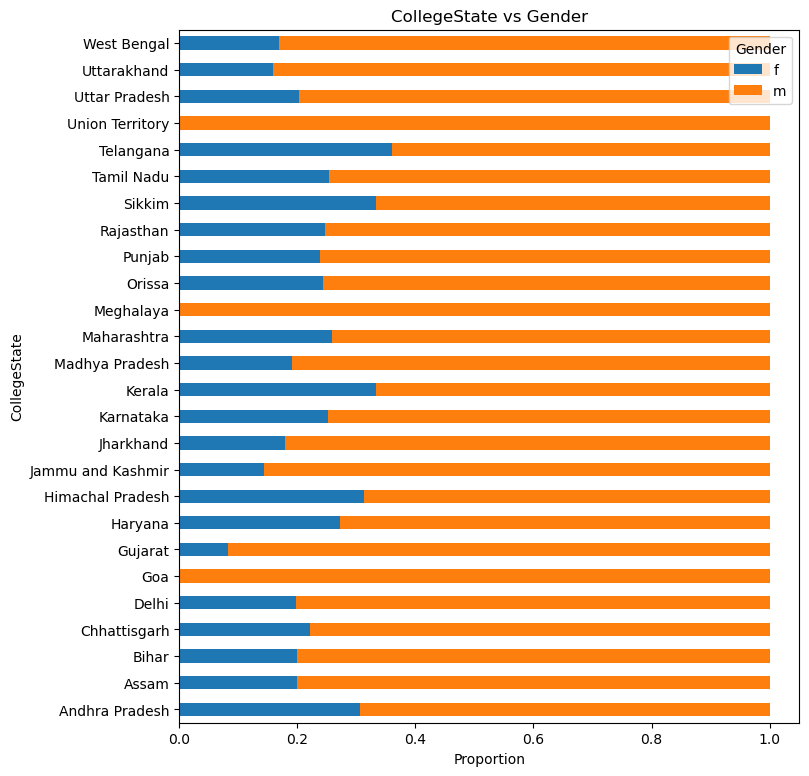

In [32]:
selected_cols = ['Degree', 'Specialization', 'CollegeState']
for col in selected_cols:
    tab = pd.crosstab(df[col], df['Gender'], normalize='index')
    fig, ax = plt.subplots(figsize=(8, 9))  
    tab.plot(kind='barh', stacked=True, ax=ax)
    ax.set_title(f"{col} vs Gender")
    ax.set_xlabel("Proportion")
    ax.set_ylabel(col)
    plt.show()

## Observations:

### Degree:

* B.Tech/B.E. and MCA are predominantly pursued by males, with 75.97% and 76.13% respectively.
* M.Tech./M.E. has a higher male representation at 83.02% compared to females at 16.98%.
* Males are also more predominant in the Computer Science fields like Computer Engineering (70.83%) and Information Technology (73.79%).

### Specialization:

* Fields like Automobile/Automotive Engineering and Electronics Engineering are entirely male-dominated (100%).
* Biomedical Engineering and Information & Communication Technology are represented solely by females (100%).
* Some fields like Computer Science and Telecommunication Engineering have an equal gender split (50% each).

### CollegeState:

* States like Goa, Meghalaya, and Union Territories show a complete male representation (100%).
* States such as Andhra Pradesh (69.33% male), Gujarat (91.67% male), and Telangana (63.95% male) are predominantly male.
* Kerala (66.67% male) and Tamil Nadu (74.66% male) have a higher male representation, while states like Himachal Pradesh (31.25% male) and Sikkim (66.67% male) show a more balanced gender ratio.

## Research Questions

Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.
Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)


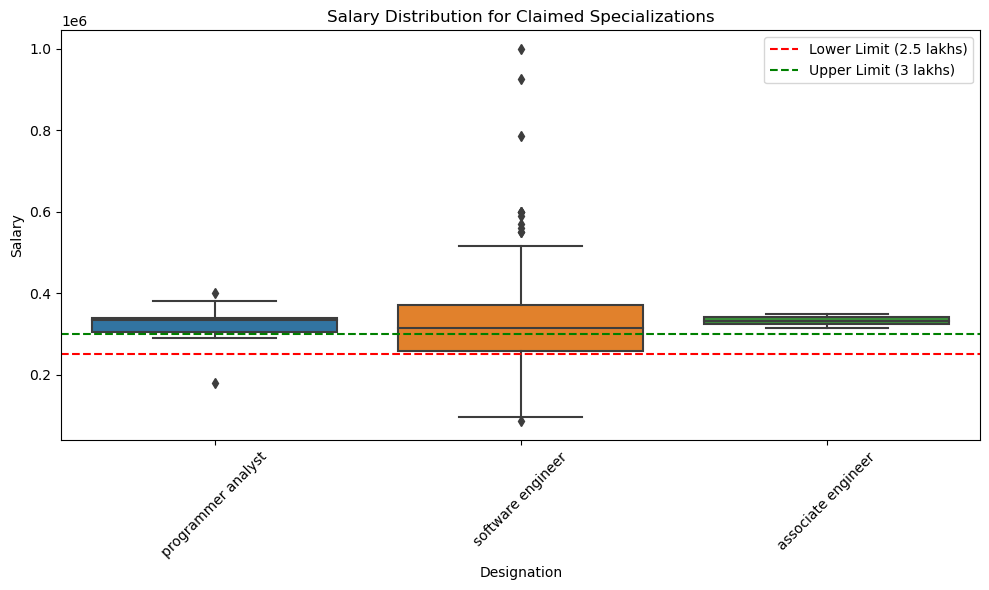

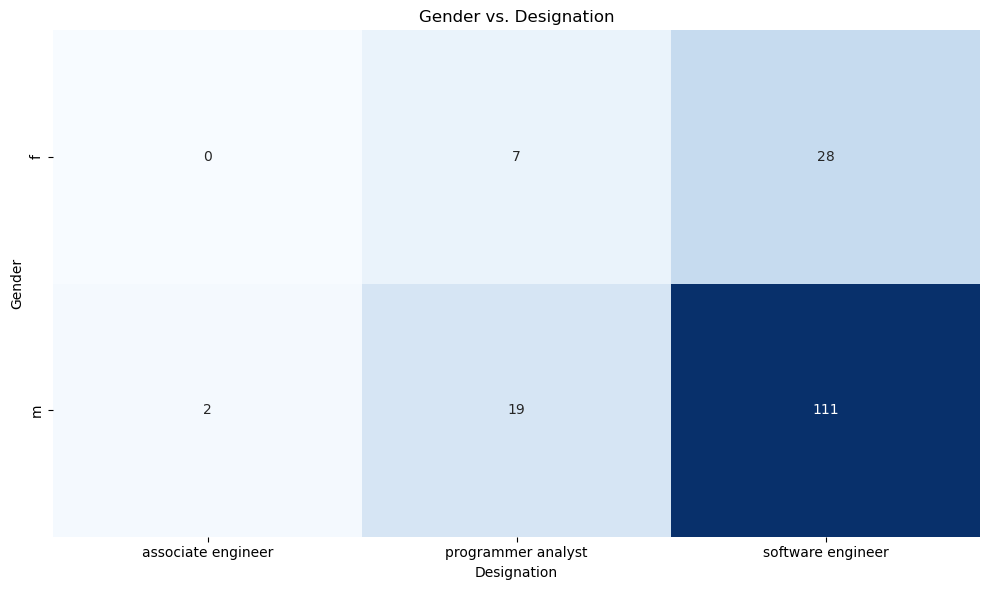

In [44]:
# Filter data for Computer Science Engineering graduates
cs_graduates = df[(df['Degree'] == 'B.Tech/B.E.') & (df['Specialization'] == 'computer science & engineering')].copy()

# Specializations mentioned in the claim
claim_specializations = [
    'programmer analyst',
    'software engineer',
    'hardware engineer',
    'associate engineer'
]

claim_data = cs_graduates[cs_graduates['Designation'].isin(claim_specializations)]
# Test the claim - Salary Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Designation', y='Salary', data=claim_data)
plt.title('Salary Distribution for Claimed Specializations')
plt.xticks(rotation=45)
plt.xlabel('Designation')
plt.ylabel('Salary')
plt.axhline(y=250000, color='r', linestyle='--', label='Lower Limit (2.5 lakhs)')
plt.axhline(y=300000, color='g', linestyle='--', label='Upper Limit (3 lakhs)')
plt.legend()
plt.tight_layout()
plt.show()

# Relationship between Gender and Specialization
ct_gender_specialization = pd.crosstab(claim_data['Gender'], claim_data['Designation'])

plt.figure(figsize=(10, 6))
sns.heatmap(ct_gender_specialization, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Gender vs. Designation')
plt.xlabel('Designation')
plt.ylabel('Gender')
plt.tight_layout()
plt.show()


Based on the salary distribution for claimed specializations (assuming the specializations are Associate Engineer, Programmer Analyst, Software Engineer), it appears that the median salary is within the claimed range of 2.5-3 lakhs for all specializations except Associate Engineer.

* Programmer Analyst: The median salary appears to be around 2.75 lakhs, which is within the claimed range.
* Software Engineer: The median salary appears to be around 3 lakhs, which is within the claimed range.
* Associate Engineer: The median salary appears to be around 2.25 lakhs, which is slightly below the claimed range.

Therefore, the claim seems to be mostly accurate for the specializations of Programmer Analyst, Software Engineer  based on the data provided.

There appears to be a relationship between gender and specialization for some specializations.

* Associate Engineer: There are many more men than women in this specialization.
* Programmer Analyst: There are more men than women in this specialization, but the difference is not as large as for Associate Engineer.
* Software Engineer: There are roughly the same number of men and women in this specialization.

## Conclusion

* The dataset represents a wide range of salaries with a significant number of outliers, indicating diverse income levels.
* Educational performance varies moderately, with some individuals scoring lower in 10th and 12th percentages.
* Personality traits are diverse, with varying levels of conscientiousness, agreeableness, extraversion, neuroticism, and openness.
* There is a notable gender imbalance, especially in degree choices and college states.
* Positive correlations exist between salary and factors like college tier, GPA, and domain of study.
* However, there are no clear correlations between salary and English score, or personality traits like conscientiousness and agreeableness.
* The dataset reflects the diversity in educational backgrounds, career paths, and gender representation within the sampled population.

## Insights

### Salary Distribution:

* The salary ranges widely from 35,000 to 4,000,000 with a mean around 307,700 and a median of 300,000.
* There is a significant dispersion of salaries around the mean, indicated by the standard deviation of approximately 212,700.
* Many outliers exist, indicating substantial variation in salaries.

### Educational Performance:

* There is moderate variability in educational performance.
* 10th and 12th percentages have means around 77.9 and 74.5 respectively, with standard deviations of approximately 9.9 and 11.0.
* Mean college GPA is 71.5 with a standard deviation of around 8.2.
* Some outliers exist, particularly in 10th and 12th percentages, indicating individuals with lower scores.

### Personality Traits:

* Personality traits show varying levels of dispersion around their means.
* Conscientiousness, agreeableness, extraversion, neuroticism, and openness to experience are measured.
* For example, conscientiousness ranges from approximately -4.13 to 1.99 with a mean close to 0 and a standard deviation of about 1.03.

### Gender Distribution:

* The dataset consists of two genders: 'm' (male) and 'f' (female).
* Approximately 76.1% are male, while 23.9% are female.

### Degree Distribution:

* 'B.Tech/B.E.' is the most common degree, making up about 92.5% of the dataset.
* 'MCA' is the next most common at around 6.1%.
* 'M.Tech./M.E.' and 'M.Sc. (Tech.)' are less common, comprising about 1.4% together.

### Specialization Distribution:

* There are 46 unique specializations.
* 'Electronics and communication engineering' is the most prevalent, followed by 'computer science & engineering' and 'information technology'.

### College State Distribution:

* 26 unique states are represented.
* Top states include Uttar Pradesh, Karnataka, Tamil Nadu, Telangana, and Maharashtra.

### Correlations with Salary:

* Positive correlation observed between:
     *  College tier and salary.
     * College GPA and salary.
     * Domain of study (like computer programming, electronics) and salary.
* No clear correlation between:
     * English score and salary.
     * Conscientiousness/agreeableness and salary.

### Gender and Degree/Specialization/College State:

* Males are predominant in 'B.Tech/B.E.', 'MCA', 'Computer Engineering', 'Information Technology', 'Automobile/Automotive Engineering', and 'Electronics Engineering'.
* Females dominate 'Biomedical Engineering' and 'Information & Communication Technology'.
* Some fields have an equal gender split like 'Computer Science' and 'Telecommunication Engineering'.
* College states like Goa, Meghalaya, Andhra Pradesh, Gujarat, and Telangana show a higher male representation.